In [12]:
# Imports and constants
import pandas as pd
from sqlalchemy.sql import text
from lib import Output, TaxiDBReader, GREEN, YELLOW, TABLES, tabulate, CHUNK_SIZE, TABLE_FORMAT, SEPARATOR, DR, getDF, COLUMNS, normalizedColumns

O = Output('output/ppt_output.txt') 
    
O.clear()
O.out(SEPARATOR)
O.out('DS Capstone')
O.out(SEPARATOR)



In [20]:
import matplotlib.pyplot as plt
import numpy as np

def runSql(sql):
    with DR.engn.connect() as conn:
        return conn.execute(sql)

def plotNegPos(categories, values):
    # Width of each bar
    width = 0.35

    # Create an array of x positions for the bars
    x = np.arange(len(categories))

    # Create the figure and axes
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(9)

    # Plot the first set of bars
    rects1 = ax.bar(x - width/2, values['neg'], width, label='Negative')

    # Plot the second set of bars
    rects2 = ax.bar(x + width/2, values['pos'], width, label='Positive')

    # Add labels and titles
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_ylabel('Values')
    ax.set_title('Positive vs Negative Values')
    ax.legend()

    # Show the plot
    plt.show()

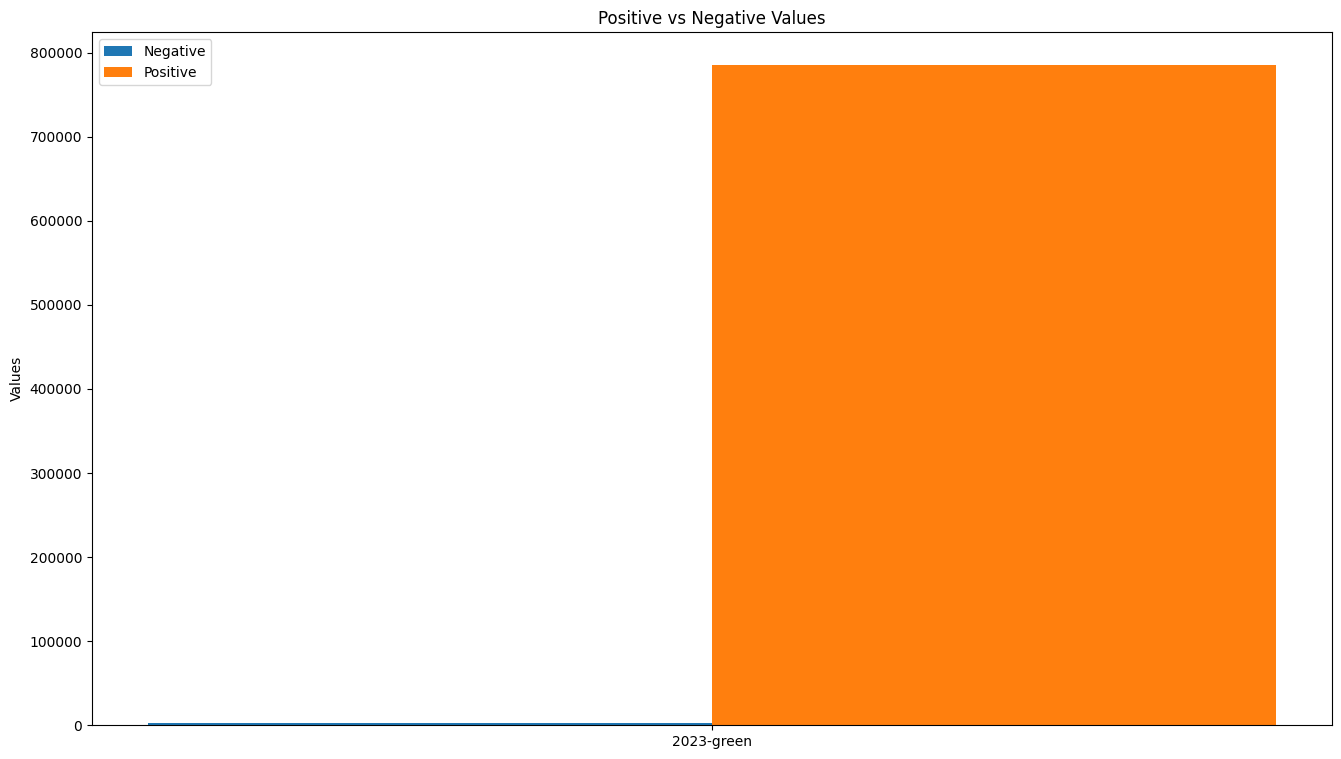

In [21]:
# ctables = [(GREEN, 2023)]

numericals = [
    'passenger_count', 'trip_distance', 'total_amount',
    'fare_amount', 'tip_amount', 'mta_tax', 'tolls_amount', 'extra', 'improvement_surcharge', 'congestion_surcharge',
]

def posClause():
    conditions = []
    for i,c in enumerate(numericals):
        if (i+1) % 4 == 0:
            conditions.append(f'\n\t\t{c} >= 0')
        else:
            conditions.append(f'{c} >= 0')
    return " AND ".join(conditions)

def negClause():
    conditions = []
    for i,c in enumerate(numericals):
        if (i+1) % 4 == 0:
            conditions.append(f'\n\t\t{c} < 0')
        else:
            conditions.append(f'{c} < 0')
    return " OR ".join(conditions)

cats = []
vals = {'neg': [], 'pos': []}
for t in TABLES:
    taxi_type, year  = t
    DR.setTable(year, taxi_type)
    table_name = DR.getTableName()
    O.out(f'table name: {table_name}')

    O.out(f'Negative values analysis')
    O.out(SEPARATOR)
    
    sql = text(f'''
    SELECT 
        (SELECT COUNT(1) FROM {table_name} WHERE {posClause()}) as pos,
        (SELECT COUNT(1) FROM {table_name} WHERE {negClause()}) as neg
''')
    # print(sql)
    O.out(sql)
    df = getDF(sql)
    O.out(df, True)

    cats.append(f'{year}-{taxi_type}')
    vals['neg'].append(df['neg'].iloc[0])
    vals['pos'].append(df['pos'].iloc[0])

plotNegPos(cats, vals)



In [14]:
for t in TABLES:
    taxi_type, year  = t
    DR.setTable(year, taxi_type)
    table_name = DR.getTableName()

    res = runSql(text(f'''
    SELECT COUNT(1) FROM {table_name}
'''))

    O.out(f'table name: {table_name}')
    O.out(f'# of rows: {res.scalar()}')
    O.out(SEPARATOR)